### The data is an Imbalance data (More number of Normal class than the Fraud class)

The following are the basic methods for handling imbalance datasets

1)Undersampling:- Taking the less number of majority class(Less number of Normal transactions so that our new data will be balanced)
       
2)SMOTE:- Oversampling were we will make a synthetic example of minority class(Fraud transactions) to fet a balanced dataset
       

!pip install imblearn
!pip install --upgrade pip

In [9]:
##importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from collections import Counter
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
% matplotlib inline
import imblearn
from imblearn.over_sampling import SMOTE

### 1.Data ingestion into Pandas

In [10]:
##loading the dataset
data = pd.read_csv('G://Assignment 3//creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 2.Explorating dataset

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [12]:
## Checking for missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


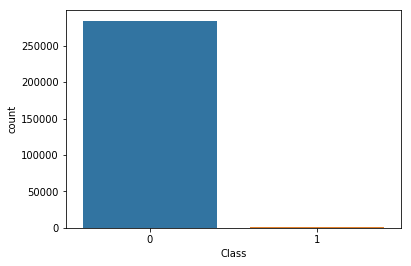

In [14]:
## checking the distribution of classes
sns.countplot(x="Class",data=data)

We can see from the above bar graph that the data is unbalanced

0 - represents Normal Transactions

1 - represents Fraud Transactions

In [15]:
# now let us check in the number of Percentage
Count_Normal_transacation = len(data[data["Class"]==0]) # normal transaction are repersented by 0
Count_Fraud_transacation = len(data[data["Class"]==1]) # fraud by 1

## Calculating percentage of Normal transaction
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of Normal Transacation is",Percentage_of_Normal_transacation*100)

## Calculating percentage of Fraud transaction
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of Fraud Transacation is",Percentage_of_Fraud_transacation*100)

percentage of Normal Transacation is 99.82725143693798
percentage of Fraud Transacation is 0.1727485630620034


- Hence in data there is only 0.17% of Fraud transaction and 99.82% are valid normal transacions

- Since the data is unbalanced we have to do resampling but before doing it lets have a look at the amount related to valid transaction and fraud transaction

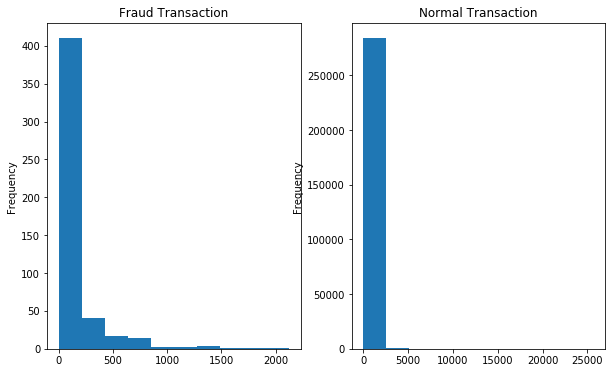

In [16]:
Fraud_transaction = data[data["Class"]==1]
Normal_transaction = data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transaction.Amount.plot.hist(title="Fraud Transaction")
plt.subplot(122)
Normal_transaction.Amount.plot.hist(title="Normal Transaction")

- The above distribution for Normal transaction is not clear and it seems that most of the transaction are less tha 5k.Lets plot a graph to check the actual amount

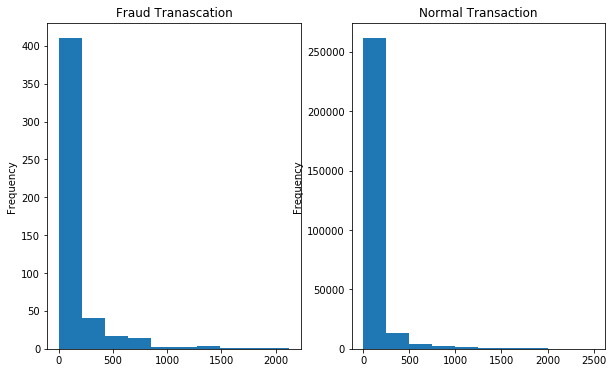

In [17]:
Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation[Fraud_transacation["Amount"]<= 2500].Amount.plot.hist(title="Fraud Tranascation")
plt.subplot(122)
Normal_transacation[Normal_transacation["Amount"]<=2500].Amount.plot.hist(title="Normal Transaction")

- Here now after exploring data we can say there is no pattern in data
- We are not going to perform feature engineering in first instance. The dataset has been already downgraded using PCA in order to contain 30 features (28 anonamised + time + amount).
- Changing the performance metric:
   - Use the confusio nmatrix to calculate Precision, Recall
   - F1score (weighted average of precision recall)
   - Use Kappa - which is a classification accuracy normalized by the              imbalance of the classes in the data
   - ROC curves - calculates sensitivity/specificity ratio.

### Approach
- We will now compare what happens when using resampling and when not using     it. We will test this approach using following models:
 - Logistic Regression
 - SVM
 - Random forest classifier
 - XGboost
 

### Under Sampling

Before re sampling lets have look at the different accuracy metrices

- Accuracy = TP+TN/Total

- Precison = TP/(TP+FP)

- Recall = TP/(TP+FN)

- TP = True possitive means no of possitve cases which are predicted           positive

- TN = True negative means no of negative cases which are predicted negative

- FP = False possitve means no of negative cases which are predicted positive

- FN= False Negative means no of possitive cases which are predicted negative

Now for our case recall will be a better option because in these case no of normal transacations will be very high than the no of fraud cases and sometime a fraud case will be predicted as normal. So, recall will give us a sense of only fraud cases

In this we will resample our data with different size,then we will try to use this resampled data to train our model.Then we will use this model to predict for our original data

#### Plotting barplot for fraud and non-fraudulant transactions.
#### Analysis based on Time

In [18]:
# As the time provided is in seconds we can use it as seconds since epoch as we won't care about years
def convert_totime(seconds):
    return datetime.datetime.utcfromtimestamp(seconds);

timeAnalysis = data[['Time', 'Amount', 'Class']].copy()
timeAnalysis['datetime'] = timeAnalysis.Time.apply(convert_totime)
# As the max time is 172792 seconds and 172792 / (60*60) is about 48 hrs so we only have data for 2 days so only 
# plotting data against hours make sense
timeAnalysis['hour of the day'] = timeAnalysis.datetime.dt.hour
timeAnalysisGrouped = timeAnalysis.groupby(['Class', 'hour of the day'])['Amount'].count()

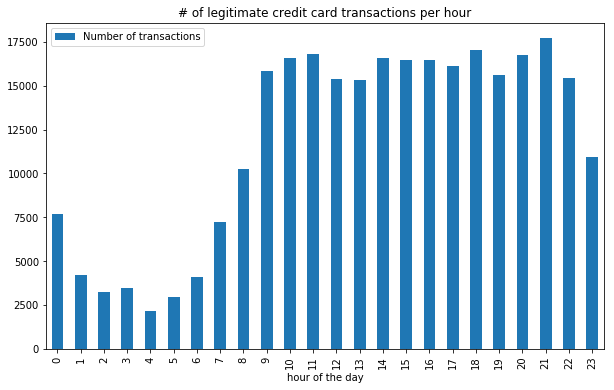

In [19]:
plt.figure(figsize =(10,6))
validTransactions = timeAnalysisGrouped[0].copy()
validTransactions.name = 'Number of transactions'
validTransactions.plot.bar(title = '# of legitimate credit card transactions per hour', legend = True)

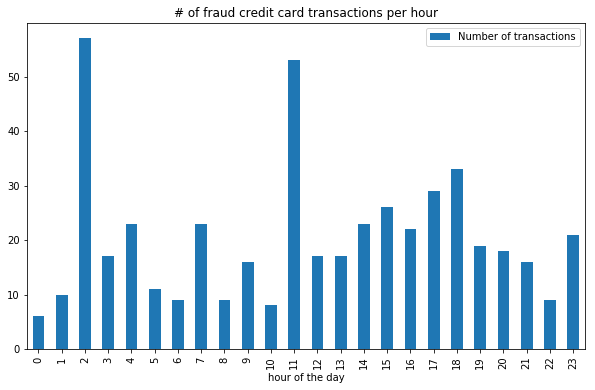

In [20]:
plt.figure(figsize = (10, 6))
fraudTransactions = timeAnalysisGrouped[1].copy()
fraudTransactions.name = 'Number of transactions'
fraudTransactions.plot.bar(title = '# of fraud credit card transactions per hour', legend = True)

In [21]:
timeAnalysis['minutes'] = timeAnalysis.datetime.dt.minute
timeAnalysisGrouped = timeAnalysis.groupby(['Class', 'minutes'])['Amount'].count()

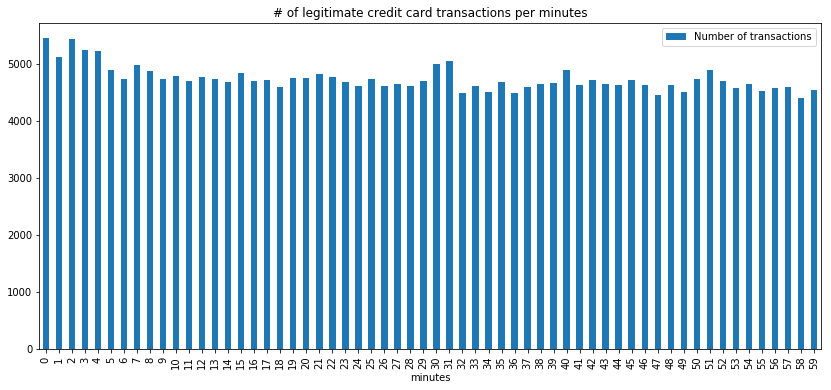

In [22]:
plt.figure(figsize =(14,6))
validTransactions = timeAnalysisGrouped[0].copy()
validTransactions.name = 'Number of transactions'
validTransactions.plot.bar(title = '# of legitimate credit card transactions per minutes', legend = True)

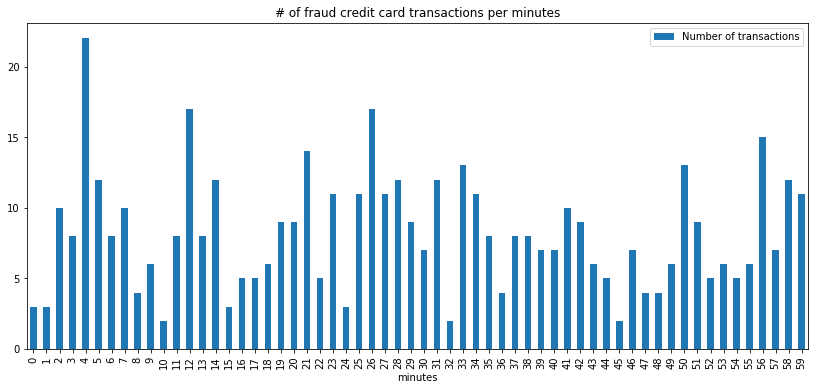

In [23]:
plt.figure(figsize = (14, 6))
fraudTransactions = timeAnalysisGrouped[1].copy()
fraudTransactions.name = 'Number of transactions'
fraudTransactions.plot.bar(title = '# of fraud credit card transactions per minutes', legend = True)

In [24]:
timeAnalysis['Day'] = timeAnalysis.datetime.dt.day
timeAnalysisGrouped = timeAnalysis.groupby(['Class', 'Day'])['Amount'].count()

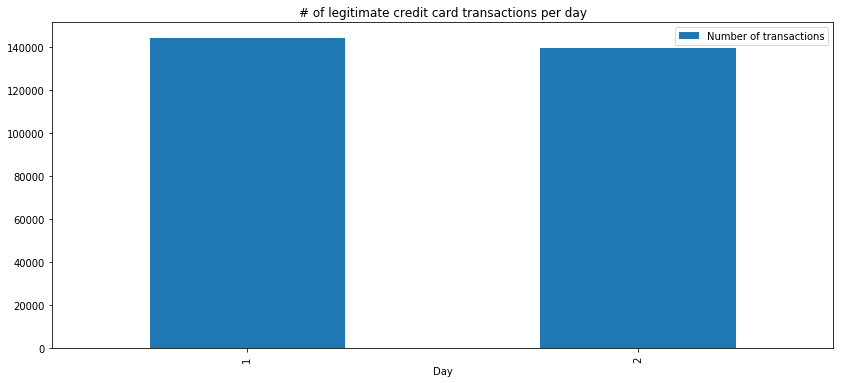

In [25]:
plt.figure(figsize =(14,6))
validTransactions = timeAnalysisGrouped[0].copy()
validTransactions.name = 'Number of transactions'
validTransactions.plot.bar(title = '# of legitimate credit card transactions per day', legend = True)

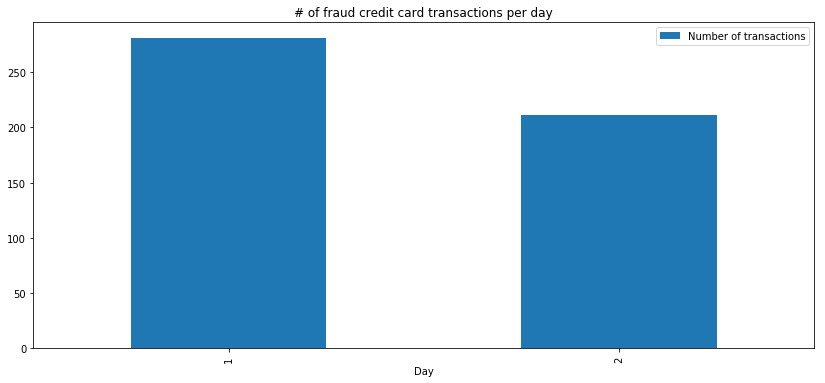

In [26]:
plt.figure(figsize = (14, 6))
fraudTransactions = timeAnalysisGrouped[1].copy()
fraudTransactions.name = 'Number of transactions'
fraudTransactions.plot.bar(title = '# of fraud credit card transactions per day', legend = True)

#### Outlier detection Technique
#### z-score

In [27]:
#Hypothesis test

population = timeAnalysis[timeAnalysis.Class == 0].Amount
sample = timeAnalysis[timeAnalysis.Class == 1].Amount
sampleMean = sample.mean()
populationStd = population.std()
populationMean = population.mean()

In [28]:
z_score = (sampleMean - populationMean) / (populationStd / sample.size ** 0.5)
z_score

3.008289898215099

In [29]:
# Gettting the PDA columns
PDA_columns = [x for x in data.columns if 'V' in x]

valid_transactions = data[data.Class == 0]
Fraud_transactions = data[data.Class == 1]
#Getting the number of rows
sample_size = Fraud_transactions.shape[0]
for col in PDA_columns:
    mean = valid_transactions[col].mean()
    std = valid_transactions[col].std()
    zScore = (Fraud_transactions[col].mean() - mean) / (std/sample_size**0.5)
    print ('Column', col, 'is', 'Significant' if abs(zScore) >= 3.37 else 'insignificant')

Column V1 is Significant
Column V2 is Significant
Column V3 is Significant
Column V4 is Significant
Column V5 is Significant
Column V6 is Significant
Column V7 is Significant
Column V8 is Significant
Column V9 is Significant
Column V10 is Significant
Column V11 is Significant
Column V12 is Significant
Column V13 is insignificant
Column V14 is Significant
Column V15 is insignificant
Column V16 is Significant
Column V17 is Significant
Column V18 is Significant
Column V19 is Significant
Column V20 is Significant
Column V21 is Significant
Column V22 is insignificant
Column V23 is insignificant
Column V24 is Significant
Column V25 is insignificant
Column V26 is insignificant
Column V27 is Significant
Column V28 is Significant


### 3.Feature Engineering 

#### Plotting graph to get idea about normally distibuted data and left or right skewed distributed data which can be an anomaly¶

C:\Users\HP\Anaconda32\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


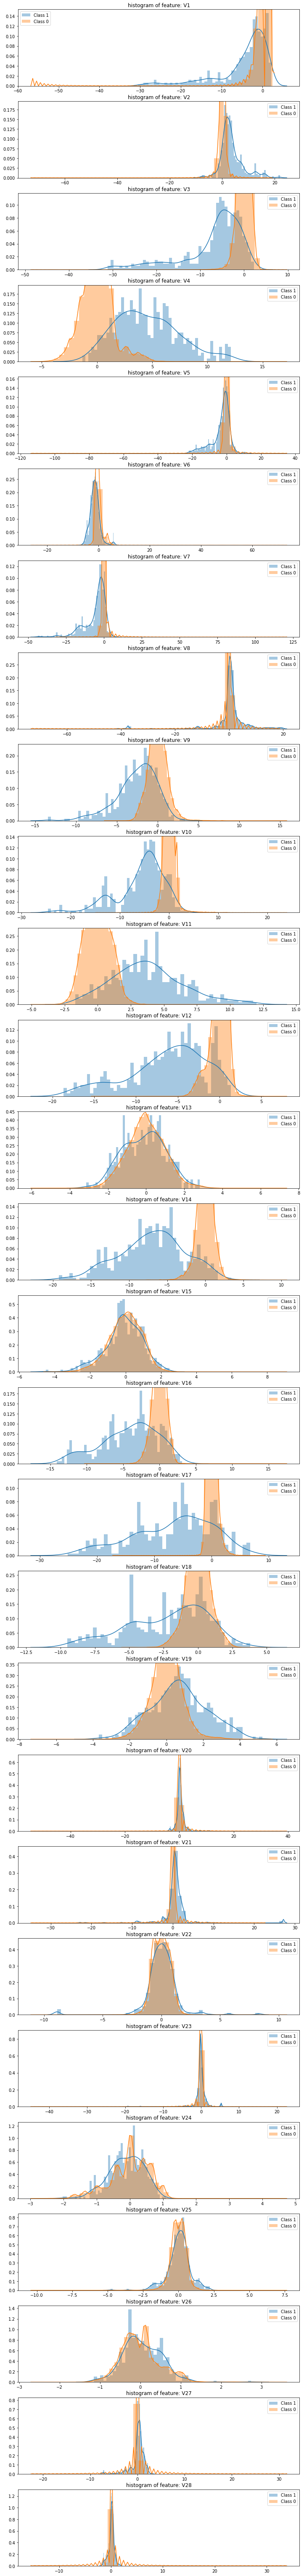

In [30]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
v_features = data.ix[:,1:29].columns
for i, cn in enumerate(data[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data.Class == 1], bins=50,label ='Class 1')
    sns.distplot(data[cn][data.Class == 0], bins=50, label = 'Class 0')
    ax.legend()
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

#### Removing normally distributed data as it won't affect the transaction

In [31]:
df = data.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)

#### Plotting data using box plot to get an idea about outliers present¶

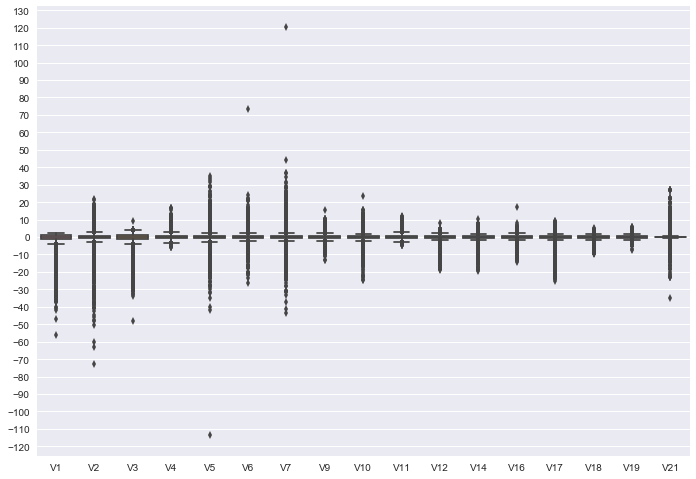

In [32]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.ticker as ticker
ax = plt.axes()
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
data1 = data[['V1','V2','V3','V4','V5','V6','V7','V9','V10','V11','V12','V14','V16','V17','V18','V19','V21']]
sns.boxplot(data=data1)

In [33]:
data.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

#### Removing outliers by taking into consideration mean ad standard deviation

In [34]:
def reject_outliers(d, m=0.9):
    return d[abs(d - np.mean(d)) < m * np.std(d)]

In [35]:
filtered_d = reject_outliers(data1)
filtered_d.count()

V1     198177
V2     238491
V3     190914
V4     199110
V5     219229
V6     223910
V7     233987
V9     195876
V10    219417
V11    171435
V12    208494
V14    214282
V16    198849
V17    215276
V18    193500
V19    196769
V21    265524
dtype: int64

In [36]:
filtered_d['Class'] = data['Class']

#### Replacing missing values with mean

In [37]:
filtered_d.fillna(filtered_d.mean(),inplace=True)
filtered_d.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Class
0,-1.359807,-0.072781,0.122564,-0.001341,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,-0.019219,0.104228,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,0
2,-1.358354,-1.340163,0.122564,0.379780,-0.503198,-0.233384,0.791461,-0.030568,0.207643,0.624501,0.066084,-0.165946,0.044001,-0.060338,-0.121359,0.003127,0.247998,0
3,-0.966272,-0.185226,0.122564,-0.863291,-0.010309,-0.233384,0.237609,-0.030568,-0.054952,-0.226487,0.178228,-0.287924,0.044001,-0.684093,-0.004935,0.003127,-0.108300,0
4,-1.158233,0.877737,0.122564,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,0.038790,-0.451449,-0.237033,-0.038195,0.003127,-0.009431,0


In [38]:
filtered_d.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V9       0
V10      0
V11      0
V12      0
V14      0
V16      0
V17      0
V18      0
V19      0
V21      0
Class    0
dtype: int64

In [39]:
filtered_d.count()

V1       284807
V2       284807
V3       284807
V4       284807
V5       284807
V6       284807
V7       284807
V9       284807
V10      284807
V11      284807
V12      284807
V14      284807
V16      284807
V17      284807
V18      284807
V19      284807
V21      284807
Class    284807
dtype: int64

#### Plotting data in box plot after removing outliers¶

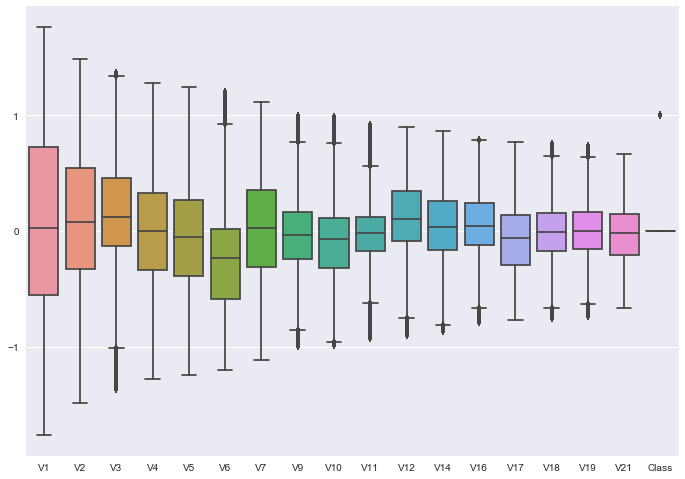

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.ticker as ticker
ax = plt.axes()

ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
sns.boxplot(data = filtered_d)

In [41]:
filtered_d.count()

V1       284807
V2       284807
V3       284807
V4       284807
V5       284807
V6       284807
V7       284807
V9       284807
V10      284807
V11      284807
V12      284807
V14      284807
V16      284807
V17      284807
V18      284807
V19      284807
V21      284807
Class    284807
dtype: int64

In [42]:
filtered_d['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

C:\Users\HP\Anaconda32\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


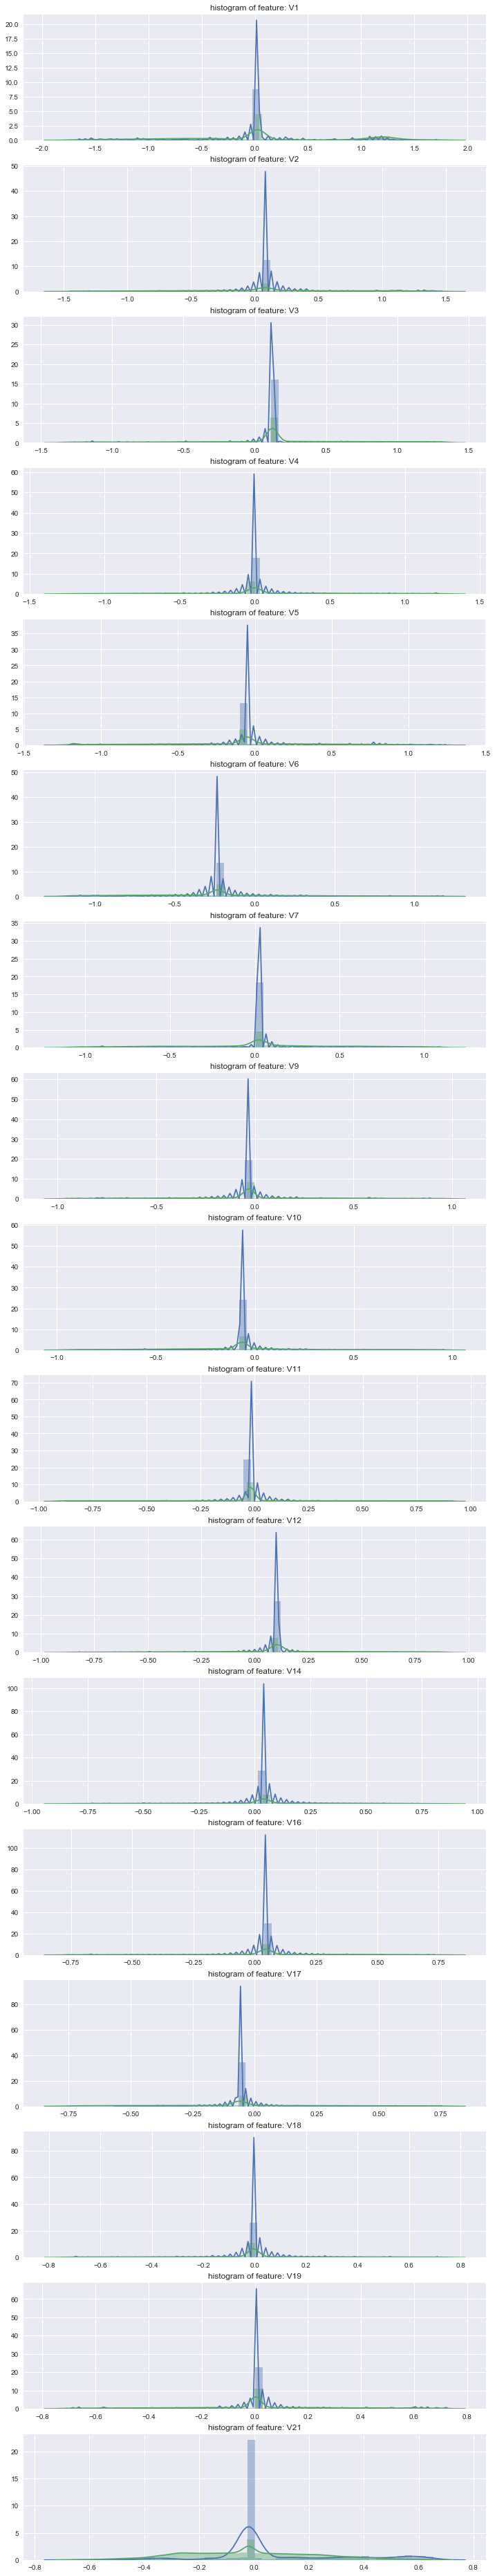

In [43]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28,1)
v_features = filtered_d.ix[:,0:17].columns
for i, cn in enumerate(filtered_d[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(filtered_d[cn][data.Class == 1], bins=50)
    sns.distplot(filtered_d[cn][data.Class == 0], bins=50)
    ax.legend()
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

### 4.Applying Algorithms

In [44]:
# split data into X and y
X = filtered_d.iloc[:,0:16]
Y = filtered_d.iloc[:, 17]

### SMOTE(OVERSAMPLING)

In [45]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_res, y_res = sm.fit_sample(X, Y)

C:\Users\HP\Anaconda32\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [46]:
np.bincount(y_res)

array([284315, 284315], dtype=int64)

In [47]:
## fitting multiple linear regression to the training set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=np.random)

#### Logistic Regression

In [48]:
# fit model no training data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
Y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 1.00


### 5.Accuracy Metric

In [50]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[56864     0]
 [   98     0]]


In [51]:
trail = []
trail =confusion_matrix
trail

array([[56864,     0],
       [   98,     0]], dtype=int64)

In [52]:
TP= trail[0,0]
FN= trail[0,1]
FP= trail[1,0]
TN= trail[1,1]

In [53]:
## Compute Precision, Recall, f1-score & Support
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))
print("TP (no of fraud transaction which are predicted fraud) - ",trail[0,0]) 
print("TN (no of normal transaction which are predited normal) - ",trail[1,1])
print("FP (no of normal transaction which are predicted fraud) - ",trail[1,0]) 
print("FN (no of fraud Transaction which are predicted normal) - ",trail[0,1])

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56864
          1       0.00      0.00      0.00        98

avg / total       1.00      1.00      1.00     56962

TP (no of fraud transaction which are predicted fraud) -  56864
TN (no of normal transaction which are predited normal) -  0
FP (no of normal transaction which are predicted fraud) -  98
FN (no of fraud Transaction which are predicted normal) -  0


C:\Users\HP\Anaconda32\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Cross-Validation

In [54]:
#Simple K-Fold cross validation. 10folds.
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
accuracies = cross_val_score(estimator=LogisticRegression(), X=X_train, y=Y_train,cv=10)
accuracies.mean()

0.99827075481719874

In [55]:
#Simple K-Fold cross validation. 10folds.
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
accuracies = cross_val_score(estimator=LogisticRegression(), X=X_test, y=Y_test,cv=10)
accuracies.mean()

0.99827956215891844

### ROC curve

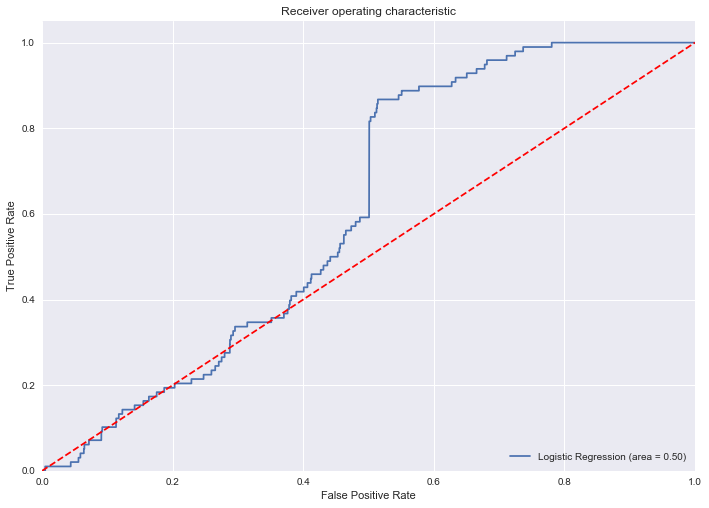

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rfc = RandomForestClassifier(n_estimators=50,random_state=np.random)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=np.random)
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False,
            random_state=<module 'numpy.random' from 'C:\\Users\\HP\\Anaconda32\\lib\\site-packages\\numpy\\random\\__init__.py'>,
            verbose=0, warm_start=False)

In [58]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[56856     0]
 [  106     0]]


In [59]:
trail = []
trail =confusion_matrix
trail

array([[56856,     0],
       [  106,     0]], dtype=int64)

In [60]:
TP= trail[0,0]
FN= trail[0,1]
FP= trail[1,0]
TN= trail[1,1]

In [61]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))
print("TP (no of fraud transaction which are predicted fraud) - ",trail[0,0]) 
print("TN (no of normal transaction which are predited normal) - ",trail[1,1])
print("FP (no of normal transaction which are predicted fraud) - ",trail[1,0]) 
print("FN (no of fraud Transaction which are predicted normal) - ",trail[0,1])

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56856
          1       0.00      0.00      0.00       106

avg / total       1.00      1.00      1.00     56962

TP (no of fraud transaction which are predicted fraud) -  56856
TN (no of normal transaction which are predited normal) -  0
FP (no of normal transaction which are predicted fraud) -  106
FN (no of fraud Transaction which are predicted normal) -  0


C:\Users\HP\Anaconda32\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [62]:
#Simple K-Fold cross validation. 10folds.
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
accuracies = cross_val_score(estimator=RandomForestClassifier(), X=X_train, y=Y_train,cv=10)
accuracies.mean()

0.99865698518632695

In [63]:
#Simple K-Fold cross validation. 10folds.
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
accuracies = cross_val_score(estimator=RandomForestClassifier(), X=X_test, y=Y_test,cv=10)
accuracies.mean()

0.99843757084231599

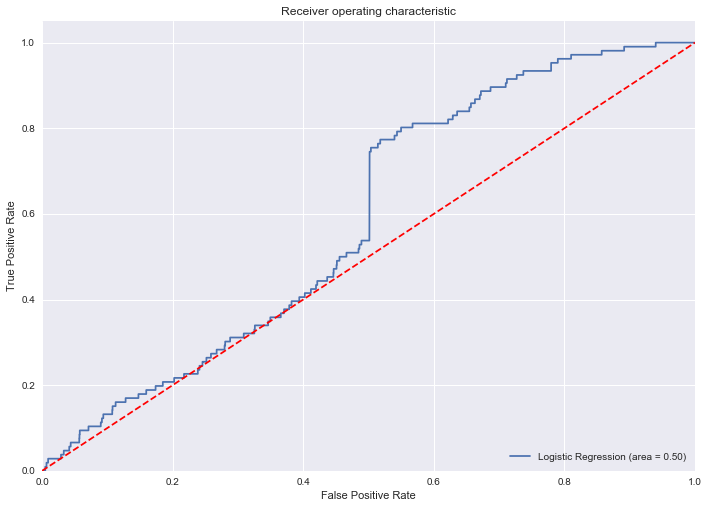

In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### SVM

In [65]:
#from sklearn import svm
from sklearn.datasets import make_classification
#clf = svm.SVC()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=np.random)
clf.fit(X_train,Y_train)

NameError: name 'clf' is not defined

In [ ]:
## Confusion Matrix
#from sklearn.metrics import confusion_matrix
#confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

In [ ]:
trail = []
trail =confusion_matrix
trail

In [ ]:
#from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))
print("TP (no of fraud transaction which are predicted fraud) - ",trail[0,0]) 
print("TN (no of normal transaction which are predited normal) - ",trail[1,1])
print("FP (no of normal transaction which are predicted fraud) - ",trail[1,0]) 
print("FN (no of fraud Transaction which are predicted normal) - ",trail[0,1])

In [ ]:
#Simple K-Fold cross validation. 10folds.
#from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=svm.SVC(), X=X_train, y=Y_train,cv=10)
accuracies.mean()

In [ ]:
#Simple K-Fold cross validation. 10folds.
#from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=svm.SVC(), X=X_test, y=Y_test,cv=10)
accuracies.mean()

In [ ]:
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Bernoulii's Naive Bayes

In [70]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification
NB = BernoulliNB()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=np.random)
NB.fit(X_train,Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [71]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[56874     0]
 [   88     0]]


In [72]:
trail = []
trail =confusion_matrix
trail

array([[56874,     0],
       [   88,     0]], dtype=int64)

In [73]:
TP= trail[0,0]
FN= trail[0,1]
FP= trail[1,0]
TN= trail[1,1]

In [74]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))
print("TP (no of fraud transaction which are predicted fraud) - ",trail[0,0]) 
print("TN (no of normal transaction which are predited normal) - ",trail[1,1])
print("FP (no of normal transaction which are predicted fraud) - ",trail[1,0]) 
print("FN (no of fraud Transaction which are predicted normal) - ",trail[0,1])

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56874
          1       0.00      0.00      0.00        88

avg / total       1.00      1.00      1.00     56962

TP (no of fraud transaction which are predicted fraud) -  56874
TN (no of normal transaction which are predited normal) -  0
FP (no of normal transaction which are predicted fraud) -  88
FN (no of fraud Transaction which are predicted normal) -  0


C:\Users\HP\Anaconda32\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [75]:
#Simple K-Fold cross validation. 10folds.
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
accuracies = cross_val_score(estimator=RandomForestClassifier(), X=X_train, y=Y_train,cv=10)
accuracies.mean()

0.99869648273806122

In [76]:
#Simple K-Fold cross validation. 10folds.
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
accuracies = cross_val_score(estimator=RandomForestClassifier(), X=X_test, y=Y_test,cv=10)
accuracies.mean()

0.99864822961191435

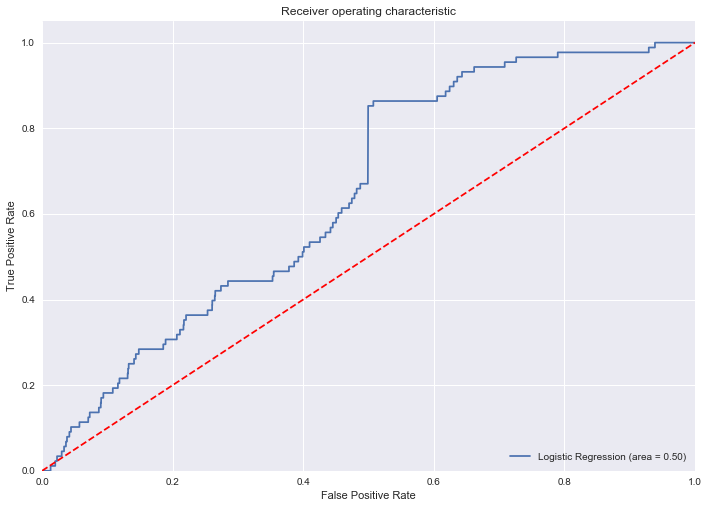

In [77]:
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 6.Store accuracy metrics and error metrics in csv file

In [ ]:
import zipfile
import os
from boto.s3.key import Key
import time
import datetime

In [ ]:
accessKey = input('accesskey ')
secretAccessKey =input('secretAccessKey ')
location = input('location ')

if not accessKey or not secretAccessKey:
    print('Access Key and Secret Access Key not provided!!')
    exit()

AWS_ACCESS_KEY_ID = accessKey
AWS_SECRET_ACCESS_KEY = secretAccessKey
inputLocation = location
try:
    conn = boto.connect_s3(AWS_ACCESS_KEY_ID,
            AWS_SECRET_ACCESS_KEY)

    print("Connected to S3")

except:
    print("Amazon keys are invalid!!")
    exit()

In [ ]:
dataset = pd.read_csv('G://Assignment 3//creditcard.csv',header=1)

In [ ]:
def split_dataset(dataset):
    data = (dataset)
    print("yo2")
    X = data[['V1','V2','V3','V4','V5','V6','V7','V9','V10','V11','V12','V14','V16','V17','V18','V19','V21']]

    y = data['Class']
    return X, y


In [ ]:
def sampling(dataset):
    X,y  = split_dataset(dataset)
    print("yo3")
    sm = SMOTE(random_state=12, ratio = 1.0)
    x_res, y_res = sm.fit_sample(X, y)
    return x_res,y_res

In [ ]:
def train_test(dataset):
    x_res, y_res = sampling(dataset)
    print("yo4")
    x_train_res, x_val_res, y_train_res, y_val_res = train_test_split(x_res,
                                                    y_res,
                                                    test_size = .2,
                                                    random_state=12)
    return x_train_res, x_val_res, y_train_res, y_val_res

In [ ]:
def models():
    model = [RandomForestClassifier(n_estimators=40, max_depth=10),
              KNeighborsClassifier(n_neighbors=4),
              LogisticRegression(),
              BernoulliNB(),
              ExtraTreesClassifier(n_estimators = 500 , random_state = np.random)
            ]
    return model

In [ ]:
def fit_model(model, dataset):
    #prediction=[]
    x_train_res, x_val_res, y_train_res, y_val_res = train_test(dataset)
    print("yo5")
    #model = models()
    #for i in range(0,len(model)):
    model.fit(x_train_res,y_train_res)
    prediction = model.predict(x_val_res)
    f1score = f1_score(y_val_res, prediction)
    accuracy = accuracy_score(y_val_res, prediction)
    cm = confusion_matrix(y_val_res, prediction)
    tp = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[1][1]
    
    return f1score,accuracy,tp,fp,fn,tn

In [ ]:
def accuracyscore(dataset):
    model = models()
    accuracy =[]
    model_name =[]
    f1score = []
    true_positive =[]
    false_positive =[]
    true_negative =[]
    false_negative =[]
    for i in range(0,len(model)):
        f,a,tp,fp,fn,tn = fit_model(model[i],dataset)
        print("yo6")
        model_name.append(str(model[i]).split("(")[0])
        f1score.append(f)
        accuracy.append(a)
        #matrix.append(cm)
        true_positive.append(tp) 
        false_positive.append(fp)
        true_negative.append(fn) 
        false_negative.append(tn)     
    return model_name,f1score,accuracy,true_positive,false_positive,true_negative,false_negative

In [ ]:
def performance_metrics(dataset):
    summary2 = accuracyscore(dataset)
    print("yo7")
    describe1 = pd.DataFrame(summary2[0],columns = {"Model_Name"})
    describe2 = pd.DataFrame(summary2[1],columns = {"F1_score"})
    describe3 = pd.DataFrame(summary2[2], columns ={"Accuracy_score"})
    describe4 = pd.DataFrame(summary2[3], columns ={"True_Positive"})
    describe5 = pd.DataFrame(summary2[4], columns ={"False_Positive"})
    describe6 = pd.DataFrame(summary2[5], columns ={"True_Negative"})
    describe7 = pd.DataFrame(summary2[6], columns ={"False_Negative"})
    des = describe1.merge(describe2, left_index=True, right_index=True, how='inner')
    des = des.merge(describe3,left_index=True, right_index=True, how='inner')
    des = des.merge(describe4,left_index=True, right_index=True, how='inner')
    des = des.merge(describe5,left_index=True, right_index=True, how='inner')
    des = des.merge(describe6,left_index=True, right_index=True, how='inner')
    des = des.merge(describe7,left_index=True, right_index=True, how='inner')
    final_csv = des.sort_values(ascending=False,by="Accuracy_score").reset_index(drop = True)
    return final_csv

In [ ]:
final_csv = performance_metrics(dataset)
final_csv.to_csv(str(os.getcwd()) + "/accuracy_error_metrics.csv")

In [ ]:
def logistic_reg(dataset):
    X_train, X_test, Y_train, Y_test = train_test(dataset)
    logreg = LogisticRegression()
    
    ## fitiing the model
    logreg.fit(X_train, Y_train)
    filename = 'logistic_reg_model.pckl'
    pickle.dump(logreg,open(filename,'wb'))
    
    logistic_reg_model = pickle.load(open(filename, 'rb'))
    return logistic_reg_model

In [ ]:
def Random_forest_classifier(dataset):
    X_train, X_test, Y_train, Y_test = train_test(dataset)
    rfc = RandomForestClassifier(n_estimators=50,random_state=np.random)
    
    ## fitiing the model
    rfc.fit(X_train, Y_train)
    filename = 'Random_forest_classifier_model.pckl'
    pickle.dump(rfc,open(filename,'wb'))
    
    Random_forest_classifier_model = pickle.load(open(filename, 'rb'))
    return Random_forest_classifier_model

In [ ]:
def BernoulliNB()(dataset):
    X_train, X_test, Y_train, Y_test = train_test(dataset)
    NB = BernoulliNB()
    
    ## fitiing the model
    NB.fit(X_train, Y_train)
    filename = 'BernoulliNB_model.pckl'
    pickle.dump(NB,open(filename,'wb'))
    
    BernoulliNB_model = pickle.load(open(filename, 'rb'))
    return BernoulliNB_model